In [40]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvpath= os.path.join("confirmed_global.csv")
csv_file = os.path.join("confirmed_US.csv")

In [19]:
#Reading the csv file
cases_df = pd.read_csv(csvpath, encoding="utf-8" )
confirmed_df = pd.read_csv(csv_file, encoding="utf-8")

In [35]:
#Picking up the required column from the dataset
new_cases_df = cases_df[["Country/Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]

canada_df= new_cases_df.loc[new_cases_df["Country/Region"] == "Canada"]

canada_casecount = canada_df.groupby(["Country/Region"]).sum()
#canada_rename = canada_casecount.rename(columns={"Country/Region" : "Country_Region"})
canada_casecount


,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/30/20
Country/Region,,,,,,,,
Canada,8527,54457,92479,106097,118281,130918,161107,234939


In [37]:
#Picking up the required columns from the data
new_confirmed_df = confirmed_df[["Country_Region", "3/31/20", "4/30/20", "5/31/20", "6/30/20","7/31/20","8/31/20","9/30/20", "10/30/20"]]

#Grouping the Column by State and getting a count of the Total Number of Cases 
us_casecount = new_confirmed_df.groupby(["Country_Region"]).sum()
us_casecount

,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/30/20
Country_Region,,,,,,,,
US,192101,1076694,1796670,2634076,4560437,6029571,7234242,9044255


In [38]:
merged_df = pd.concat([canada_casecount, us_casecount])
merged_df

,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/30/20
Canada,8527,54457,92479,106097,118281,130918,161107,234939
US,192101,1076694,1796670,2634076,4560437,6029571,7234242,9044255


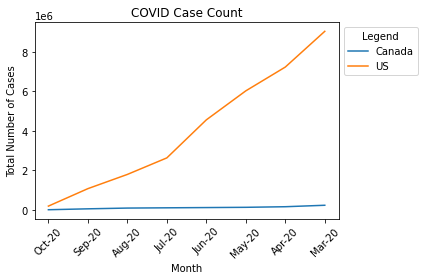

In [48]:
#Plot the covid case count from Mar 2020 to October 2020
merged_transpose.plot()
plt.title("COVID Case Count")
x_ticks=np.arange(len(merged_transpose["Canada"]))
plt.xticks(x_ticks, ["Oct-20", "Sep-20", "Aug-20", "Jul-20", "Jun-20", "May-20", "Apr-20", "Mar-20"], rotation=45)
plt.ylabel("Total Number of Cases")
plt.xlabel("Month")
plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()